# Investigate effect of backprop

In [27]:
import os
import pandas as pd

In [28]:
experiments_dir = "../experiments_backprop_improvement/"
files = [f for f in os.listdir(experiments_dir) if os.path.isfile(experiments_dir + f)]
data = []
for i, f in enumerate(files):
    data.append(pd.read_csv(experiments_dir + f))

In [30]:
k = []
zeros = []


for i in range(20):
    zeros.append([])
    k.append([])
    for d in data:
        gen_i = d[d["generation"] == i]
        k[i].append(gen_i)
        zeros[i].append(gen_i[gen_i["diff_after_backprop"] == 0].shape[0])
    k[i] = pd.concat(k[i])

Proportion of trees which did not improve each generation through backprop


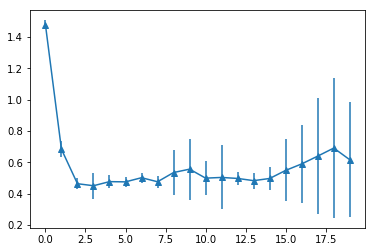

In [31]:
from statistics import mean, stdev, median
from plot import errorbar_plot

values = [(i, (mean(z)/512, stdev(z)/512)) for i, z in enumerate(zeros)]

print("Proportion of trees which did not improve each generation through backprop")
errorbar_plot(values)

Proportion of trees which did not improve each generation through backprop


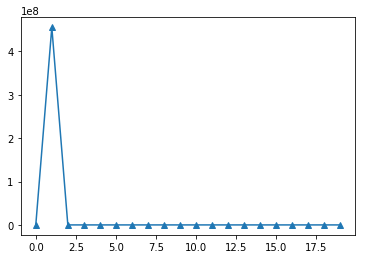

In [33]:
from statistics import mean, stdev, median
from plot import errorbar_plot

values = [(i, (z["diff_after_backprop"].mean(), 0)) for i, z in enumerate(k)]

print("Mean value of improvement")
errorbar_plot(values)

In [56]:
import matplotlib.pyplot as plt
import pylab as pl

df = k[19].sort_values(by=['current_fitness']).head(100)

df.groupby('backprop_iterations').count()["current_fitness"]

backprop_iterations
0      2
10    23
20    16
30    29
40    30
Name: current_fitness, dtype: int64

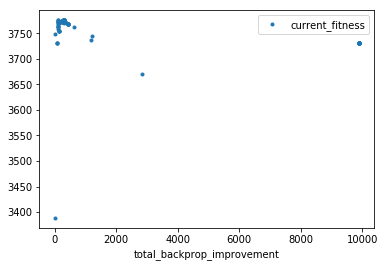

In [50]:
import matplotlib.pyplot as plt
import pylab as pl

df = k[19].sort_values(by=['current_fitness']).head(100)

df.plot(x='total_backprop_improvement', y='current_fitness', style=".")

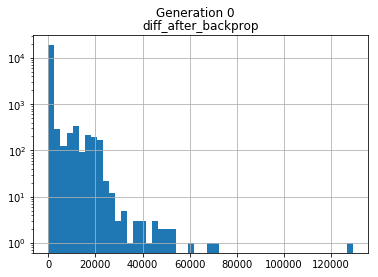

15147


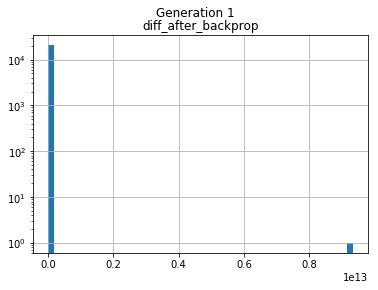

7000


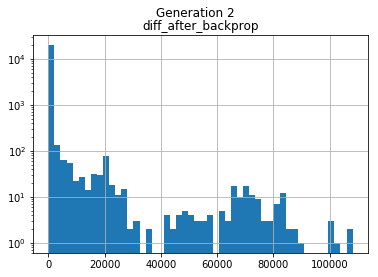

4746


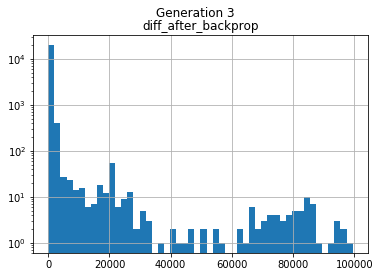

4614


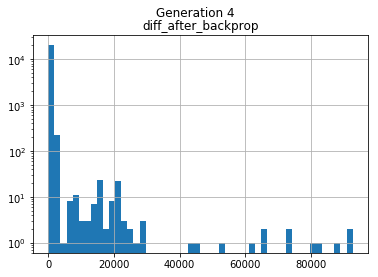

4881


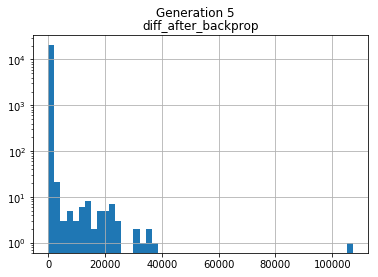

4867


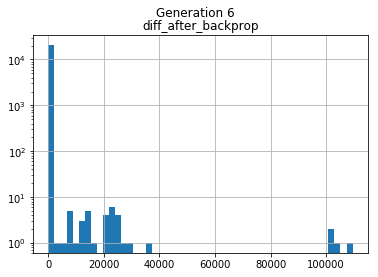

5138


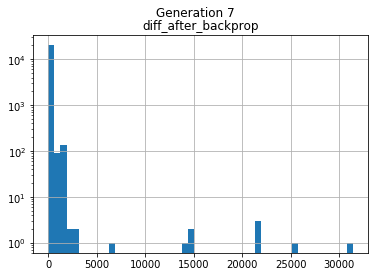

4874


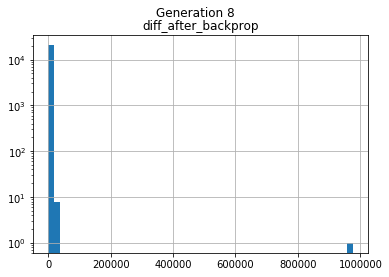

5477


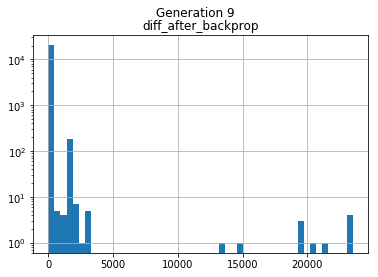

5697


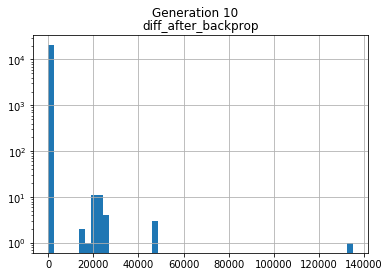

5110


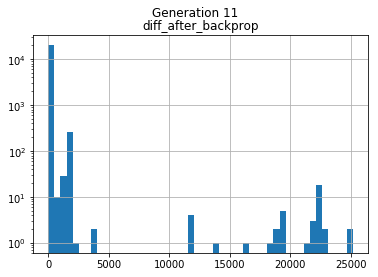

5156


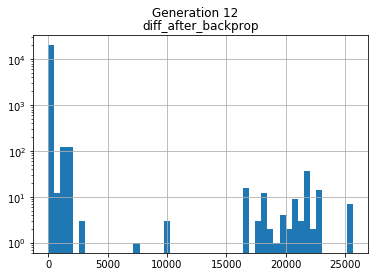

5090


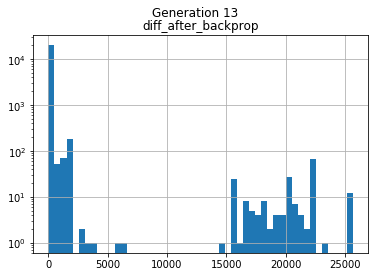

4946


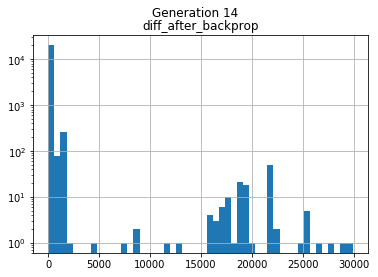

5088


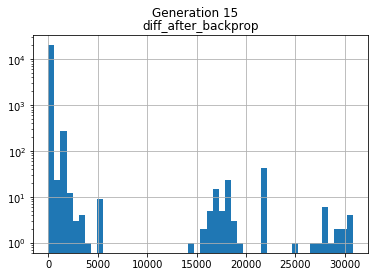

5617


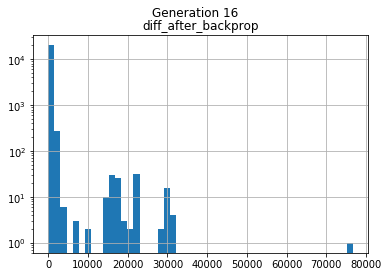

6041


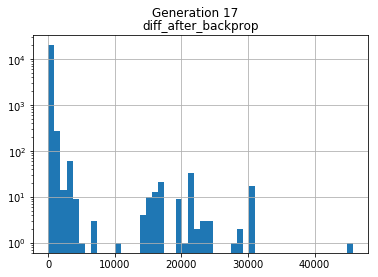

6550


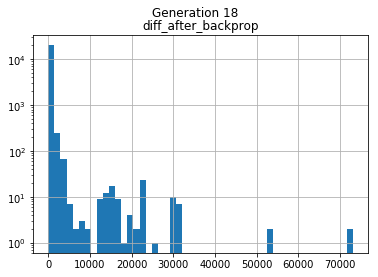

7075


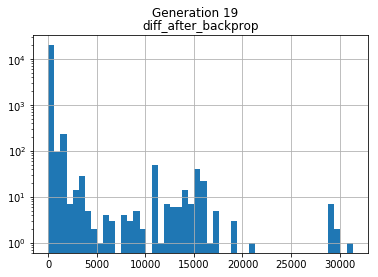

6312


In [36]:
import matplotlib.pyplot as plt
import pylab as pl

for i in range(len(k)):    
    df = k[i][k[i]["diff_after_backprop"] >= 0]
    p = df.hist(column="diff_after_backprop", log=True, bins=50)
    pl.suptitle("Generation " + str(i))
    plt.show()
    
    print((df["diff_after_backprop"]==0).astype(int).sum())